# ##############################################################
#                 Modélisation : TEST 1
# ##############################################################

In [1]:
import numpy as np
import pandas as pd

# pour afficher toutes les colonnes:
pd.options.display.max_columns = None

import matplotlib.pyplot as plt# Pie chart
import matplotlib.cm as cm

#nlp
from sklearn.feature_extraction.text import CountVectorizer

# modélisation
import statsmodels.api as sm
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

# évaluation modèle
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [15]:
#df_model = pd.read_csv("../dataset/data_modelisation.csv", sep=',')
#df_model = df_model.drop(['Unnamed: 0'], axis=1)
#df_model.head()

df = pd.read_csv("../dataset/data_gp.csv", sep=',', index_col='date')
#df = df.drop(['Unnamed: 0'], axis=1)
df.head(5)
#df_model.head()

,Avril,Decembre,Fevrier,Janvier,Juillet,Juin,Mai,Mars,Novembre,Octobre,Septembre,reel,effectif,porc,viande,bio,poisson,noel,plat_prepare,laitage,an_chinois
date,,,,,,,,,,,,,,,,,,,,,
2011-01-03,0.0,0.0,0.0,16047.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10290,16047.0,0.0,16047.0,0,0.0,0.0,16047.0,0,0
2011-01-04,0.0,0.0,0.0,17373.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11808,17373.0,0.0,17373.0,0,0.0,0.0,17373.0,87,0
2011-01-06,0.0,0.0,0.0,17373.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11741,17373.0,17373.0,17373.0,87,0.0,0.0,0.0,0,0
2011-01-07,0.0,0.0,0.0,17373.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12322,17373.0,0.0,0.0,0,17373.0,0.0,0.0,87,0
2011-01-10,0.0,0.0,0.0,17373.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11302,17373.0,0.0,0.0,0,17373.0,0.0,17373.0,87,0


In [23]:
print(df.shape)
df.info()

(1061, 21)
<class 'pandas.core.frame.DataFrame'>
Index: 1061 entries, 2011-01-03 to 2019-12-19
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Avril         1061 non-null   float64
 1   Decembre      1061 non-null   float64
 2   Fevrier       1061 non-null   float64
 3   Janvier       1061 non-null   float64
 4   Juillet       1061 non-null   float64
 5   Juin          1061 non-null   float64
 6   Mai           1061 non-null   float64
 7   Mars          1061 non-null   float64
 8   Novembre      1061 non-null   float64
 9   Octobre       1061 non-null   float64
 10  Septembre     1061 non-null   float64
 11  reel          1061 non-null   int64  
 12  effectif      1061 non-null   float64
 13  porc          1061 non-null   float64
 14  viande        1061 non-null   float64
 15  bio           1061 non-null   int64  
 16  poisson       1061 non-null   float64
 17  noel          1061 non-null   float64
 18  plat_pr

### Préparation à la modélisation

In [28]:
#df['date'] = pd.to_datetime(df['date'])
#df.set_index('date', inplace=True)

train_data = df['2015-09':'2018-07']
X_train = train_data.drop(['reel', 'effectif'], axis=1)
y_train = train_data[['reel']]

test_data = df['2018-09':'2019-07']
X_test = test_data.drop(['reel', 'effectif'], axis=1)
y_test = test_data[['reel']]

#data = df_model.drop(['effectif'], axis=1)
#X = data['2015-09':'2020-07']
#y = X[['reel']]
print("X_train : ", X_train.shape,",", "X_test :", X_test.shape)

X_train :  (379, 19) , X_test : (127, 19)


### Modélisation : premier modèle avec toutes les variables

In [30]:
#On commence à entrainer le modèle à partir de l'année scolaire 2015-2016
#On test sur l'année 2018-2019

# construction du modèle de régression linéaire multiple de moindre carré ordinaire
mod = sm.OLS(y_train, X_train)

# lancement de l'entraînement
res = mod.fit()


print(res.summary())

#dfm = df_model

# prédiction du modèle
y_pred = res.predict(X_test)
y_true = y_test

                                 OLS Regression Results                                
Dep. Variable:                   reel   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          1.474e+04
Date:                Mon, 28 Apr 2025   Prob (F-statistic):                        0.00
Time:                        18:59:58   Log-Likelihood:                         -2891.4
No. Observations:                 379   AIC:                                      5821.
Df Residuals:                     360   BIC:                                      5896.
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

### Analyse des résultats

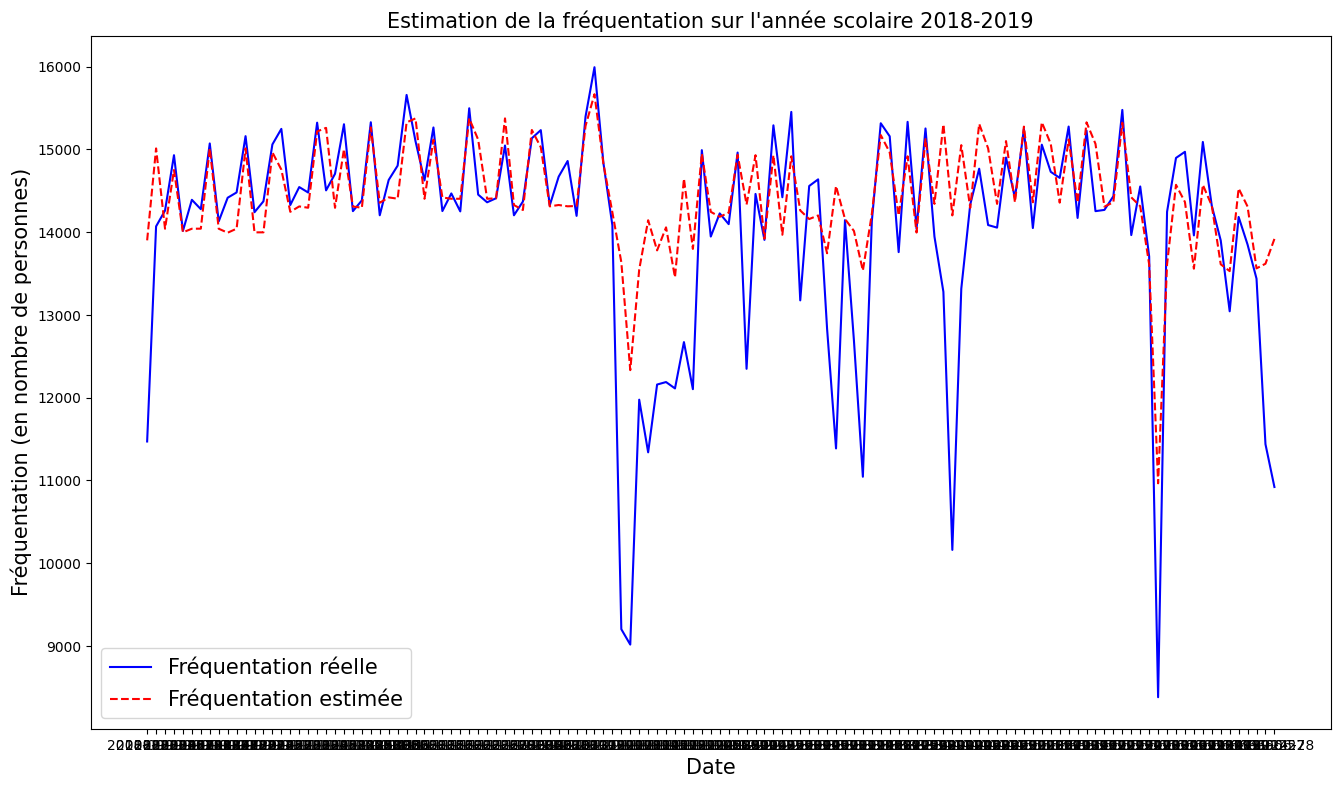

In [31]:
# Visualisation
plt.figure(figsize=(16,9))
plt.plot(y_true.index, y_true, label="Fréquentation réelle", color='blue')
plt.plot(y_pred.index, y_pred, label="Fréquentation estimée", color='red', linestyle='--')

plt.title("Estimation de la fréquentation sur l'année scolaire 2018-2019", fontsize=15)
plt.ylabel("Fréquentation (en nombre de personnes)", fontsize=15)
plt.xlabel("Date", fontsize=15)

plt.legend(fontsize=15)

### Analyse des résultats pour chaque variable

In [44]:
# Coefficients
print("Coefficients:")
print(res.params)

# P-values
print("\nP-values:")
print(res.pvalues)

# Résidus
print("\nRésidus:")
print(res.resid)

# R2
print("\nR²:")
print(res.rsquared)

results_df = pd.DataFrame({
    'coef': res.params,
    'std_err': res.bse,
    't': res.tvalues,
    'P>|t|': res.pvalues
}).round(5)

results_df

Coefficients:
Avril           0.739617
Decembre        0.738347
Fevrier         0.721265
Janvier         0.734534
Juillet         0.604427
Juin            0.703675
Mai             0.740568
Mars            0.732959
Novembre        0.742862
Octobre         0.737498
Septembre       0.725066
porc            0.002925
viande         -0.037230
bio             0.008628
poisson         0.010244
noel            0.066621
plat_prepare    0.000222
laitage         0.554370
an_chinois      7.695220
dtype: float64

P-values:
Avril           4.409195e-263
Decembre        5.969659e-271
Fevrier         5.975094e-260
Janvier         1.847617e-277
Juillet         3.949473e-164
Juin            2.309805e-277
Mai             4.056523e-271
Mars            5.917862e-275
Novembre        5.570692e-279
Octobre         4.972599e-266
Septembre       7.831006e-282
porc             4.678196e-01
viande           2.253039e-13
bio              9.892316e-01
poisson          4.593733e-02
noel             4.138657e-05
plat_

,coef,std_err,t,P>|t|
Avril,0.73962,0.00748,98.91654,0.00000
Decembre,0.73835,0.00709,104.20466,0.00000
Fevrier,0.72127,0.00744,96.88199,0.00000
Janvier,0.73453,0.00675,108.77808,0.00000
Juillet,0.60443,0.01208,50.01630,0.00000
Juin,0.70368,0.00647,108.70860,0.00000
Mai,0.74057,0.00710,104.32025,0.00000
Mars,0.73296,0.00685,106.99583,0.00000
Novembre,0.74286,0.00676,109.87337,0.00000
Octobre,0.73750,0.00731,100.86763,0.00000


A la suite de la lecture du tableau des résultats, les variables "porc", "bio", "plat_prepare", "laitage" et "an_chinois" est à supprimer puisqu'elles ont une p-value élevée (> 0,05) ce qui a un impact négligeable sur la variable cible "reel".
En lisant les résultats, la variable "viande" a un effet négatif sur la fréquentation contrairement au poisson qui a un effet positif. C'est-à-dire que les jours où il y a de la viande, il y a moins d'élèves à manger à la cantine contrairement aux journées où il y a du poisson. 

### Quelques visualisations

/tmp/ipykernel_826/656299181.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefs_sorted.values, y=coefs_sorted.index, palette='viridis')


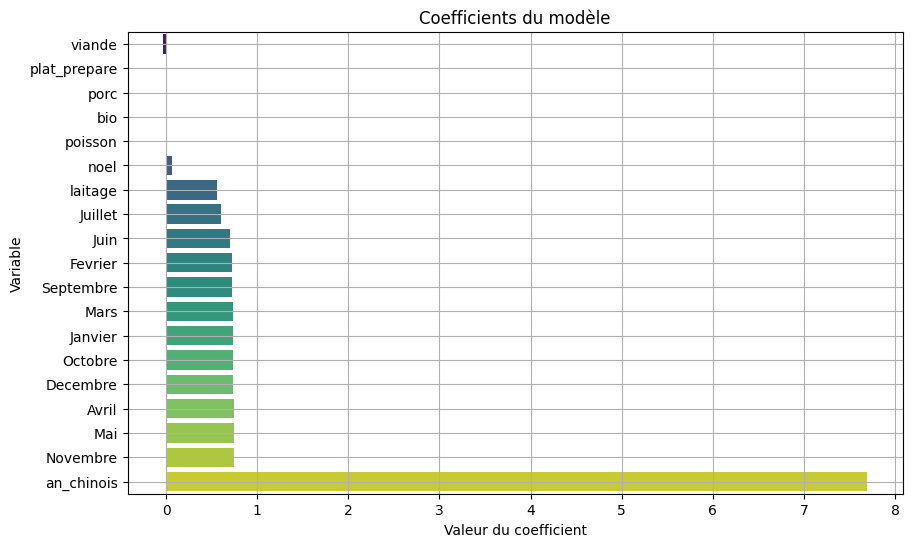

In [36]:
import seaborn as sns
coefs = res.params

# Trier pour une meilleure lecture
coefs_sorted = coefs.sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=coefs_sorted.values, y=coefs_sorted.index, palette='viridis')
plt.title('Coefficients du modèle')
plt.xlabel('Valeur du coefficient')
plt.ylabel('Variable')
plt.grid(True)
plt.show()